In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Exited
0    7963
1    2037
Name: count, dtype: int64


<Axes: xlabel='Exited'>

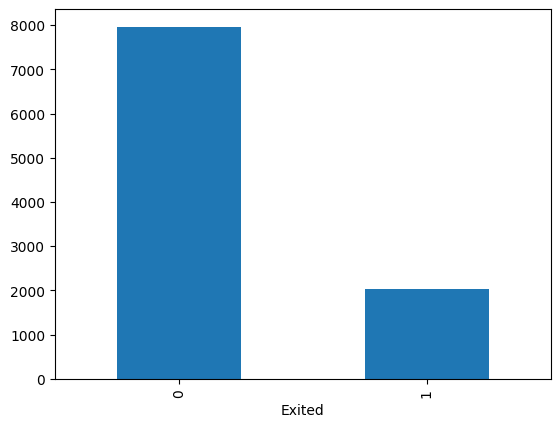

In [61]:
df=pd.read_csv("/home/harsha/Desktop/ML/Churn/Churn_Modelling.csv")
display(df)
print(df['Exited'].value_counts())
df['Exited'].value_counts().plot(kind='bar')

In [62]:
df['Gender'].value_counts()
df[df['Exited']==0]['Gender'].value_counts()

Gender
Male      4559
Female    3404
Name: count, dtype: int64

In [63]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
print(df.describe())
display(df.info())

        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769 

None

In [64]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [65]:
inputs=df[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
output=df['Exited']
x_train,x_test,y_train,y_test=train_test_split(inputs,output,test_size=0.2,random_state=42)
display(x_train)
display(x_train.shape)
display(y_train.shape)
display(x_test.shape)
display(y_test.shape)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,France,Male,32,6,0.00,2,1,1,179093.26
1561,632,Germany,Male,42,4,119624.60,2,1,1,195978.86
1670,559,Spain,Male,24,3,114739.92,1,1,0,85891.02
6087,561,France,Female,27,9,135637.00,1,1,0,153080.40
6669,517,France,Male,56,9,142147.32,1,0,0,39488.04
...,...,...,...,...,...,...,...,...,...,...
5734,768,France,Male,54,8,69712.74,1,1,1,69381.05
5191,682,France,Female,58,1,0.00,1,1,1,706.50
5390,735,France,Female,38,1,0.00,3,0,0,92220.12
860,667,France,Male,43,8,190227.46,1,1,0,97508.04


(8000, 10)

(8000,)

(2000, 10)

(2000,)

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
preprocessor=ColumnTransformer(transformers=[('geo',OneHotEncoder(),['Geography','Gender']),('num',StandardScaler(),['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary'])])

In [67]:
model_LR=Pipeline(steps=[('preprocessing',preprocessor),('classifier',LogisticRegression())])
model_LR.fit(x_train,y_train)
y_pred=model_LR.predict(x_test)
display(accuracy_score(y_test,y_pred))
Acc_lr=accuracy_score(y_test,y_pred)

0.811

In [68]:
preprocessor=ColumnTransformer(transformers=[('geo',OneHotEncoder(),['Geography','Gender']),('num','passthrough',['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary'])])
model_NB=Pipeline(steps=[('preprocessing',preprocessor),('classifier',MultinomialNB())])
model_NB.fit(x_train,y_train)
y_pred=model_NB.predict(x_test)
display(accuracy_score(y_test,y_pred))
Acc_nb=accuracy_score(y_test,y_pred)

0.535

In [69]:
from sklearn.ensemble import RandomForestClassifier
preprocessor=ColumnTransformer(transformers=[('geo',OneHotEncoder(),['Geography','Gender']),('num','passthrough',['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary'])])
model_RF=Pipeline(steps=[('preprocessing',preprocessor),('classifier',RandomForestClassifier())])
model_RF.fit(x_train,y_train)
y_pred=model_RF.predict(x_test)
display(accuracy_score(y_test,y_pred))
Acc_rf=accuracy_score(y_test,y_pred)

0.866

In [70]:
test=pd.DataFrame({
    'CreditScore':[497],
    'Geography':['Spain'],
    'Gender':['Male'],
    'Age':[24],
    'Tenure':[3],
    'Balance':[0],
    'NumOfProducts':[2],
    'HasCrCard':[1],
    'IsActiveMember':[0],
    'EstimatedSalary':[76390.01]

})
pred=model_RF.predict(test)
print(pred)

[0]


In [71]:
preprocessor=ColumnTransformer(transformers=[('geo',OneHotEncoder(),['Geography','Gender']),('num','passthrough',['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary'])])
model_RF=Pipeline(steps=[('preprocessing',preprocessor),('classifier',svm.SVC())])
model_RF.fit(x_train,y_train)
y_pred=model_RF.predict(x_test)
display(accuracy_score(y_test,y_pred))
Acc_svm=accuracy_score(y_test,y_pred)

0.8035

Text(0.5, 1.0, 'Accuracy Comparison')

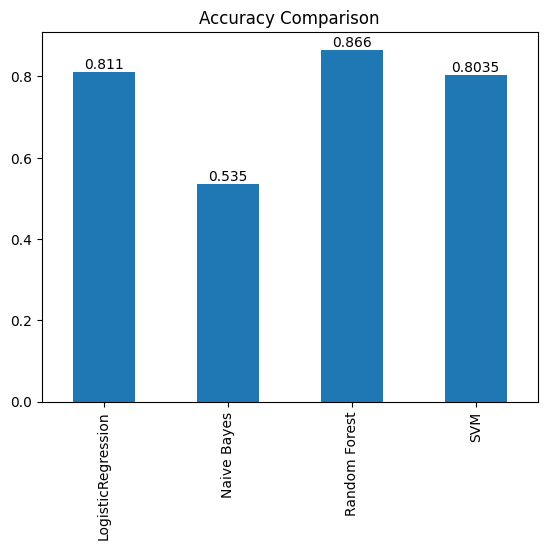

In [85]:
acc=pd.DataFrame({'Accuracy':[Acc_lr,Acc_nb,Acc_rf,Acc_svm]},index=['LogisticRegression','Naive Bayes','Random Forest','SVM'])
acc['Accuracy'].plot(kind='bar').bar_label(acc['Accuracy'].plot(kind='bar').containers[0])
plt.title("Accuracy Comparison")